<a href="https://www.kaggle.com/code/mikedelong/la-crime-eda-with-map?scriptVersionId=249120790" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/los-angeles-crime-dataset-2020-present/Crime_Data_from_2020_to_Present.csv', 
                 parse_dates=['Date Rptd', 'DATE OCC']).drop(columns=['DR_NO'])
df.sample(n=7)

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
280148,2021-12-17,2021-12-15,800,7,Wilshire,719,1,310,BURGLARY,1607 0344,...,IC,Invest Cont,310.0,NaN,NaN,NaN,300 N LUCERNE BL,NaN,34.0762,-118.3248
108661,2020-12-01,2020-12-01,745,16,Foothill,1643,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,IC,Invest Cont,440.0,NaN,NaN,NaN,12900 GLAMIS ST,NaN,34.2574,-118.4159
484554,2022-09-26,2022-09-23,1838,1,Central,153,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344 2028 1414 1822 0325,...,IC,Invest Cont,442.0,NaN,NaN,NaN,600 S BROADWAY,NaN,34.0466,-118.2520
294752,2021-07-22,2021-03-16,1300,19,Mission,1988,2,662,"BUNCO, GRAND THEFT",0701 1822 1916,...,IC,Invest Cont,662.0,NaN,NaN,NaN,13100 TONOPAH ST,NaN,34.2267,-118.4201
522041,2022-10-11,2022-10-08,1830,16,Foothill,1613,1,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,12700 VAN NUYS BL,NaN,34.2755,-118.4092
353378,2021-09-23,2021-09-23,1348,8,West LA,817,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0443,...,IC,Invest Cont,930.0,NaN,NaN,NaN,900 GAYLEY AV,NaN,34.0634,-118.4483
131062,2020-06-12,2020-04-07,1645,21,Topanga,2129,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,IC,Invest Cont,745.0,NaN,NaN,NaN,19900 ROSCOE BL,NaN,34.2203,-118.5667


In [2]:
df.columns.to_frame().T

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON


Let's look at some distributions; we'll look at victim age first, and we need to filter out Age == 0 for unknown ages.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Vict Age', ylabel='Count'>

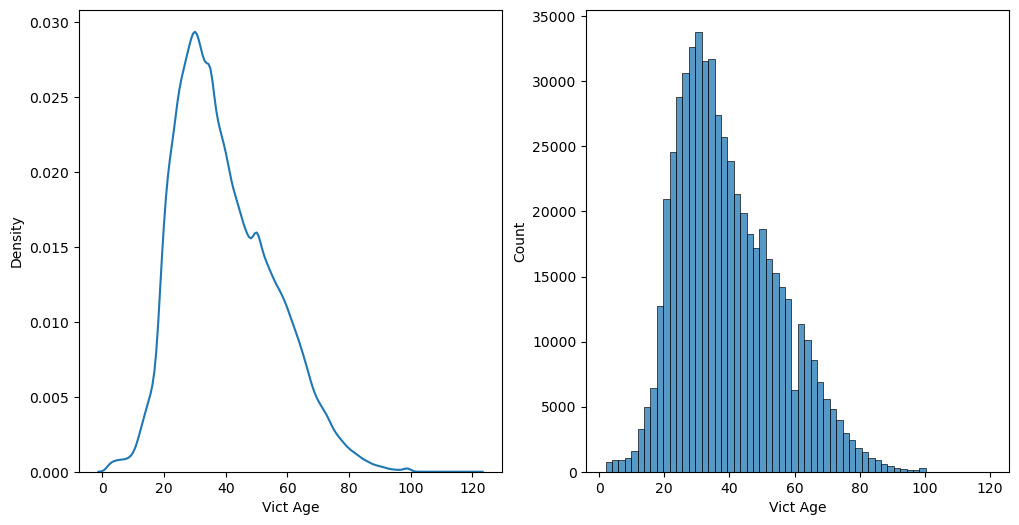

In [3]:
%matplotlib inline
from seaborn import kdeplot
from seaborn import histplot
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(12, 6), ncols=2)
kdeplot(ax=ax[0], data=df[df['Vict Age'] > 0], x='Vict Age') 
histplot(ax=ax[1], data=df[df['Vict Age'] > 0], x='Vict Age', bins=60)

Next let's visualize a small sample on an interactive map using Folium.

In [4]:
from folium import Icon
from folium import Map
from folium import Marker

sample_size = 1000

# we have a limited color map so we loop it to pad it out
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple',
          'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray'] * 7
code_color_map = dict(zip(tuple(df['Crm Cd'].unique()), tuple(colors)))

# for some reason we have to fudge the center a little
lon_fudge = -0.5
location_map = Map(location=[df['LAT'].mean(), df['LON'].mean() + lon_fudge], zoom_start=10.5)
for index, row in df.sample(sample_size).iterrows():
    popup = '{}/{}/{}:{}'.format(row['LOCATION'], row['AREA NAME'], row['Crm Cd Desc'], row['Status'])
    Marker([row['LAT'], row['LON']], popup=popup, icon=Icon(color=code_color_map[row['Crm Cd']])).add_to(parent=location_map)

location_map

How much data do we have?

In [5]:
df.shape

(752911, 27)

And how many unique crime codes do we have?

In [6]:
df['Crm Cd'].nunique()

138

We have 138 codes; clearly we can't make sense of a pie with that many slices, so let's look at the top ten or so

In [7]:
crime_code_value_counts = df['Crm Cd Desc'].value_counts()
code_df = pd.DataFrame(data={'Code': crime_code_value_counts.index, 'Count': crime_code_value_counts.values}).reset_index(drop=True)
code_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Code,VEHICLE - STOLEN,BATTERY - SIMPLE ASSAULT,THEFT OF IDENTITY,BURGLARY FROM VEHICLE,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",BURGLARY,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",THEFT PLAIN - PETTY ($950 & UNDER),INTIMATE PARTNER - SIMPLE ASSAULT,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
Count,80439,59630,48645,46526,46157,45717,43149,38510,37947,29310


In [8]:
from plotly import express
from plotly import io

io.renderers.default = 'iframe'
code_df.loc[code_df['Count'] < 15000, 'Code'] = 'Other' # we have too many codes so let's apply a threshold
express.histogram(data_frame=code_df, x='Code', y='Count').show()

Surely the areas are shaped so crime totals are roughly the same in each one. A pie chart would be colorful, but a bar chart probably does a better job of representing what we want to see. 

In [9]:
express.bar(data_frame=df['AREA NAME'].value_counts().to_frame().reset_index().rename(columns={'index': 'Area', 'AREA NAME': 'Count'}), x='Area', y='Count')

What do we see in this chart? We see that the Foothill area has roughly half the crime of the Central area, so crime is not really evenly distributed among the areas.

In [10]:
victim_descent = df['Vict Descent'].replace(to_replace={'B': 'Black', 'H': 'Hispanic', 'W': 'White',}).value_counts()
descent_df = pd.DataFrame(data={'Descent': victim_descent.index, 'Count': victim_descent.values}).reset_index(drop=True)
descent_df.loc[descent_df['Count'] < 80000, 'Descent'] = 'Other' # threshold
express.pie(descent_df, names='Descent', values='Count').show()

<Axes: xlabel='DATE OCC'>

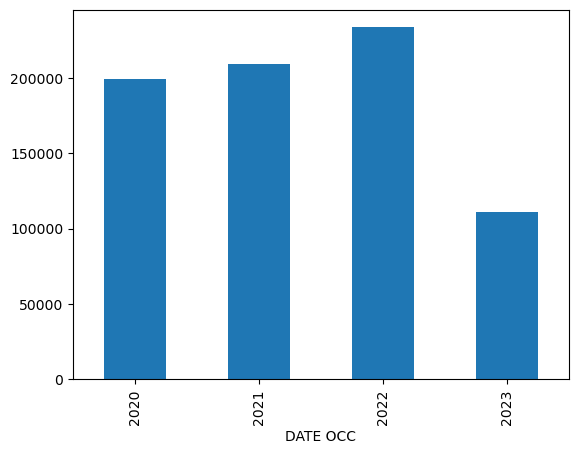

In [11]:
# not surprisingly we have an incomplete current year
df['DATE OCC'].groupby(df['DATE OCC'].dt.year).count().plot(kind='bar')

<Axes: xlabel='year'>

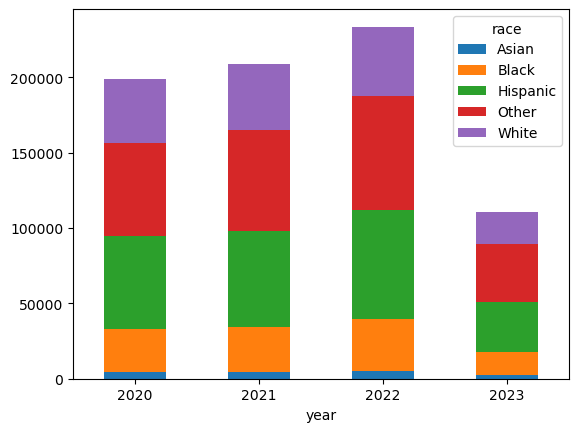

In [12]:
# is the victim's race stable year over year?
year_race_df = df[['DATE OCC', 'Vict Descent']].copy(deep=True)
year_race_df['year'] = year_race_df['DATE OCC'].dt.year
year_race_df = year_race_df.drop(columns=['DATE OCC']).rename(columns={'Vict Descent': 'race'})
year_race_df['race'] = year_race_df['race'].apply(func=lambda x: x if x in {'A', 'B', 'H', 'W'} else 
                                                  'Other').replace({'A': 'Asian', 'B': 'Black', 'H': 'Hispanic', 'W': 'White'})
year_race_df.groupby(['year', 'race']).size().unstack().plot(kind='bar', stacked=True, rot=0)

<Axes: xlabel='DATE OCC'>

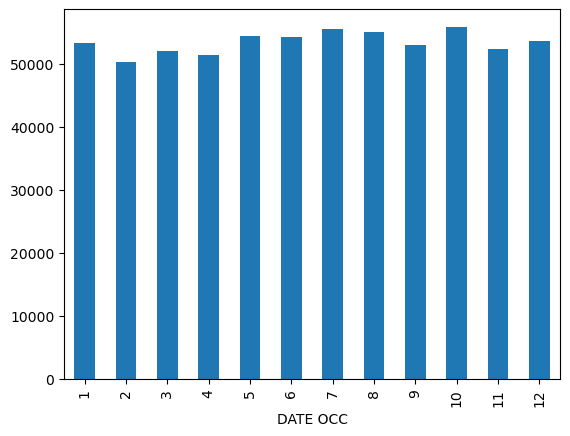

In [13]:
# where we have complete years we do not have obvious seasonality
df[df['DATE OCC'].dt.year < 2023]['DATE OCC'].groupby(df['DATE OCC'].dt.month).count().plot(kind='bar')

<Axes: xlabel='DATE OCC'>

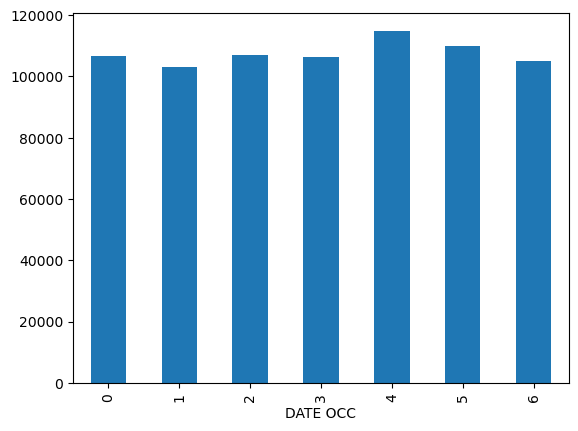

In [14]:
# nor do weekends seem to matter much
df['DATE OCC'].groupby(df['DATE OCC'].dt.dayofweek).count().plot(kind='bar')

<Axes: xlabel='DATE OCC', ylabel='Density'>

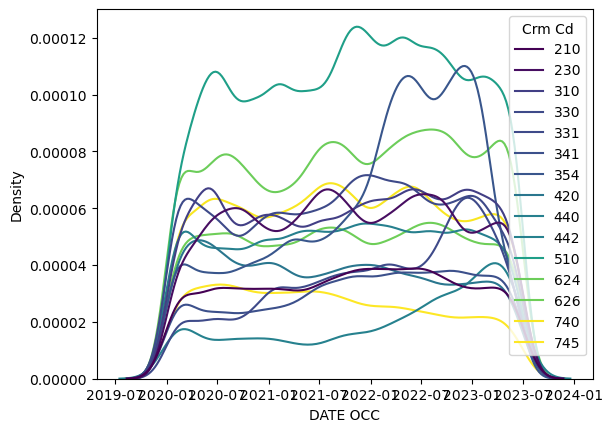

In [15]:
# if we segment by crime code do we see anything interesting?
kdeplot(data=df[df['Crm Cd'].isin(df['Crm Cd'].value_counts()[:15].index.tolist())], x='DATE OCC', hue='Crm Cd', palette='viridis')

<Axes: xlabel='DATE OCC', ylabel='Density'>

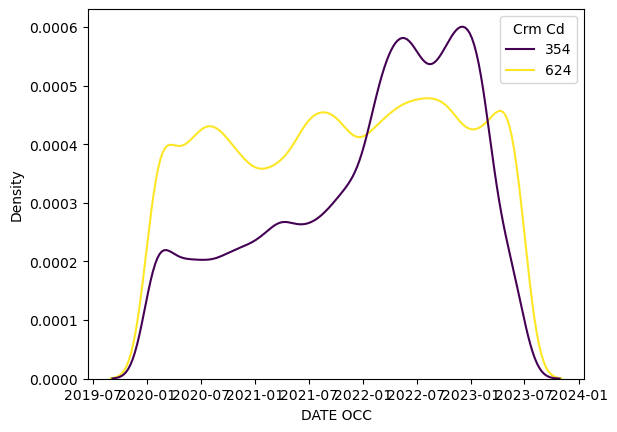

In [16]:
# we see a persistent surge in one code; which one is it?
kdeplot(data=df[df['Crm Cd'].isin(df['Crm Cd'].value_counts()[1:3].index.tolist())], x='DATE OCC', hue='Crm Cd', palette='viridis')

In [17]:
df[df['Crm Cd'].isin(df['Crm Cd'].value_counts()[:10].index.tolist())][['Crm Cd', 'Crm Cd Desc']].drop_duplicates().T

,0,4,10,15,17,18,24,30,33,45
Crm Cd,624,740,330,626,440,354,230,310,510,420
Crm Cd Desc,BATTERY - SIMPLE ASSAULT,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",BURGLARY FROM VEHICLE,INTIMATE PARTNER - SIMPLE ASSAULT,THEFT PLAIN - PETTY ($950 & UNDER),THEFT OF IDENTITY,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",BURGLARY,VEHICLE - STOLEN,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)


Identity theft seems like kind of a surprise, doesn't it?

In [18]:
# is identity theft a secular trend or is the rise concentrated in one ethnic group? 
identity_df = df[df['Crm Cd'] == 354]
identity_victim_descent = identity_df['Vict Descent'].replace(to_replace={'B': 'Black', 'H': 'Hispanic', 'W': 'White',}).value_counts()
identity_descent_df = pd.DataFrame(data={'Descent': identity_victim_descent.index, 'Count': identity_victim_descent.values}).reset_index(drop=True)
identity_descent_df.loc[identity_descent_df['Count'] < 8000, 'Descent'] = 'Other' # threshold
express.pie(identity_descent_df, names='Descent', values='Count').show()